## Dynamic Prices for E-Commerce

#### Goal: Build a model that adjusts product prices dynamically to maximize revenue or profit based on demand, inventory, and competitor pricing.

### Business Problem Statement: To improves revenue and competitiveness by adapting prices in real-time

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as ex

In [2]:
plt.style.use('ggplot')

In [3]:
df = pd.read_excel('retail.xlsx')

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    5000 non-null   object        
 1   StockCode    5000 non-null   object        
 2   Description  4988 non-null   object        
 3   Quantity     5000 non-null   int64         
 4   InvoiceDate  5000 non-null   datetime64[ns]
 5   UnitPrice    5000 non-null   float64       
 6   CustomerID   3795 non-null   float64       
 7   Country      5000 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 312.6+ KB


### Data Preprocessing

In [6]:
df.isna().sum()

InvoiceNo         0
StockCode         0
Description      12
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID     1205
Country           0
dtype: int64

In [7]:
df.duplicated().sum()

79

In [8]:
#lets remove the missing value and the duplicated value

df.dropna(inplace=True)

In [9]:
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.duplicated().sum()

0

In [12]:
## There are no quantity with zero value
## creating the totalPrice column

df['Revenue'] = df['Quantity'] * df['UnitPrice']

In [13]:
df.shape

(3716, 9)

In [14]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Revenue'],
      dtype='object')

In [15]:
#removing dataset with quantity less than or equal to ZERO

df2 = df[~df['Quantity'] < 0]

In [16]:
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [17]:
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [18]:
import warnings
warnings.filterwarnings('ignore')

In [19]:
#Extracting hours, days, months, year

df2['Year'] = pd.to_datetime(df['InvoiceDate']).dt.year
df2['month'] = pd.to_datetime(df['InvoiceDate']).dt.month
df2['DayOfWeek'] = pd.to_datetime(df['InvoiceDate']).dt.dayofweek
df2['Hour'] = pd.to_datetime(df['InvoiceDate']).dt.hour

In [20]:
df2.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,Year,month,DayOfWeek,Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,12,2,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,2,8


### EDA (Exploratory Data Analysis)

<Axes: xlabel='UnitPrice', ylabel='Quantity'>

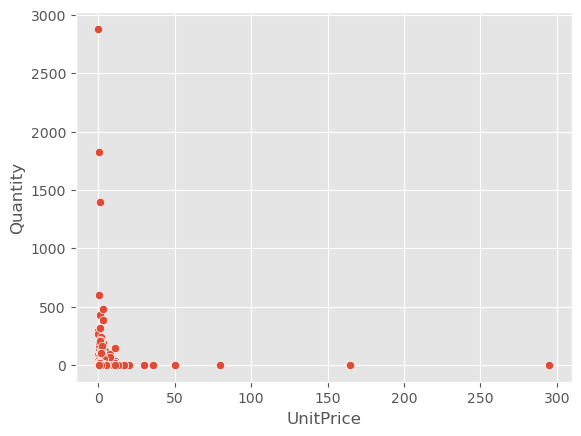

In [21]:
#plotting unitprice vs quantity 

sns.scatterplot(x='UnitPrice', y='Quantity', data=df2)

In [22]:
day_of_sales = df2.groupby('DayOfWeek')['StockCode'].count().reset_index()

In [23]:
day_of_sales['day'] = day_of_sales['DayOfWeek'].apply(lambda x: 'Tuesday' if x == 2 else 'Wednesday')

In [24]:
day_of_sales

,DayOfWeek,StockCode,day
0,2,1898,Tuesday
1,3,1748,Wednesday


<BarContainer object of 2 artists>

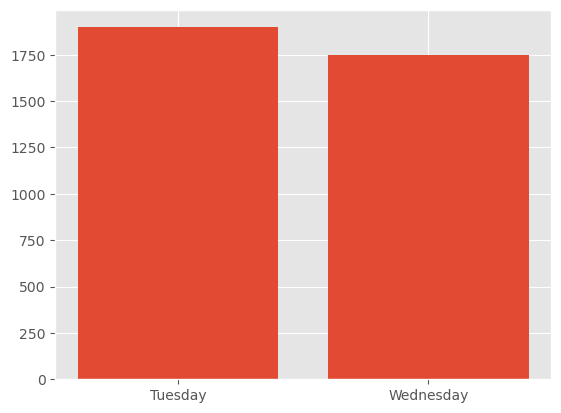

In [25]:
plt.bar(day_of_sales['day'], day_of_sales['StockCode'])

In [26]:
# Product frequency

product_freq = df2.groupby('StockCode')['Quantity'].sum().reset_index()

product = product_freq[product_freq['Quantity'] > 500]

product.head(2)

,StockCode,Quantity
13,17021,600
132,21137,613


In [27]:
df3 = df2.copy()

In [28]:
product_freq.columns = ['StockCode', 'ProductFrequency']
df2 = df.merge(product_freq, on='StockCode')

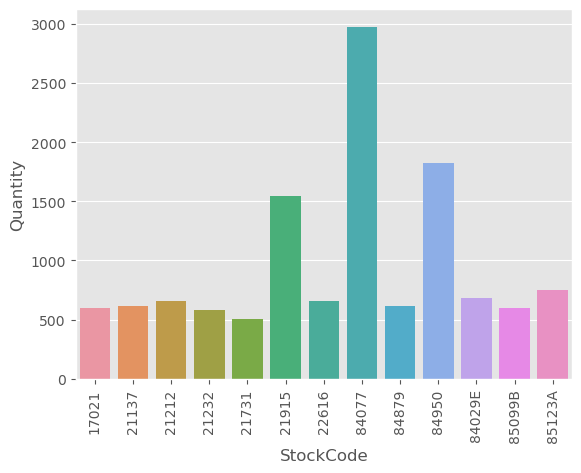

In [29]:
sns.barplot(data=product, x='StockCode', y='Quantity')
plt.xticks(rotation=90);

In [30]:
product_freq1 = df['StockCode'].value_counts().reset_index()

product_freq1.columns = ['StockCode', 'ProductFrequency']

df4 = df3.merge(product_freq, on='StockCode')


In [31]:
df4.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,Year,month,DayOfWeek,Hour,ProductFrequency
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.3,2010,12,2,8,748
1,536373,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 09:02:00,2.55,17850.0,United Kingdom,15.3,2010,12,2,9,748
2,536375,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 09:32:00,2.55,17850.0,United Kingdom,15.3,2010,12,2,9,748
3,536390,85123A,WHITE HANGING HEART T-LIGHT HOLDER,64,2010-12-01 10:19:00,2.55,17511.0,United Kingdom,163.2,2010,12,2,10,748
4,536394,85123A,WHITE HANGING HEART T-LIGHT HOLDER,32,2010-12-01 10:39:00,2.55,13408.0,United Kingdom,81.6,2010,12,2,10,748


In [32]:
df4.columns = ['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Revenue', 'Year', 'month',
       'DayOfWeek', 'Hour', 'productFrequency']

In [33]:
df4.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,Year,month,DayOfWeek,Hour,productFrequency
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.3,2010,12,2,8,748
1,536373,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 09:02:00,2.55,17850.0,United Kingdom,15.3,2010,12,2,9,748


### Modelling Building, Predicting demand based on price, time, and product frequency

#### importing library

In [34]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor


In [35]:
df5 = df4[['Quantity', 'UnitPrice', 'Hour', 'DayOfWeek', 'productFrequency']]

In [36]:
df5.head()

,Quantity,UnitPrice,Hour,DayOfWeek,productFrequency
0,6,2.55,8,2,748
1,6,2.55,9,2,748
2,6,2.55,9,2,748
3,64,2.55,10,2,748
4,32,2.55,10,2,748


In [37]:
X = df5.drop(['Quantity'], axis=1)
y = df5['Quantity']

In [38]:
X.head()

,UnitPrice,Hour,DayOfWeek,productFrequency
0,2.55,8,2,748
1,2.55,9,2,748
2,2.55,9,2,748
3,2.55,10,2,748
4,2.55,10,2,748


In [39]:
scaler = StandardScaler()

In [40]:
X_scaled = scaler.fit_transform(X)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [42]:
len(X_train), len(X_test), len(y_train), len(y_test)

(2916, 730, 2916, 730)

In [43]:
#using RandomForest Regression Algorithms

model_rfr = RandomForestRegressor()

In [44]:
model_rfr.fit(X_train, y_train)

RandomForestRegressor()

In [45]:
model_rfr.score(X_train, y_train)

0.8756699956631155

In [46]:
model_rfr.score(X_test, y_test)

0.6192196356382211

In [47]:
#using Linear Regression Algorithms

model_dt = DecisionTreeRegressor()

model_dt.fit(X_train, y_train)

DecisionTreeRegressor()

In [48]:
model_dt.score(X_train, y_train)

0.9843007946188553

In [49]:
y_pred = model_dt.predict(X_test)

### Evaluating the model

In [50]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [51]:
mae = mean_absolute_error(y_test, y_pred)

In [52]:
mae

14.263574690150035

In [53]:
mse = mean_squared_error(y_test, y_pred)

In [54]:
import math
math.sqrt(mse)

112.2757505887622

### Dynamic Price 

In [56]:
#Elasticity means percentage change in demand divided by percentage change in price

In [57]:
def suggest_price(unit_price, elasticity, target_increase_percent=0.05):
    new_price = unit_price * (1 + target_increase_percent)
    expected_quantity = model_dt.predict([[new_price, 2, 2, 748]])
    return new_price, expected_quantity

In [58]:
suggest_price(2.55, 4.6)

(2.6774999999999998, array([48.]))

### Our Dynamic Result or Pricing

In [ ]:
#Old price and quantity

#Old Price is 2.55
#Quantity is 748

#New Price now is

#New Price is 2.6
#Expected Quantity is 1824

In [74]:
#create a dataframe based on old and new prices

data = [[2.55, 748, 1907],[2.6, 1824, 4742]]


test = pd.DataFrame(data, columns=['Price', 'Quantity', 'Revenue'])

In [83]:
test

,Price,Quantity,Revenue
0,2.55,748,1907
1,2.60,1824,4742


In [75]:
test_df = test.T

In [76]:
test_df.columns = ('Old', 'New')

In [77]:
test_df

,Old,New
Price,2.55,2.6
Quantity,748.00,1824.0
Revenue,1907.00,4742.0


Text(0.5, 1.0, 'Dynamic Pricing Model')

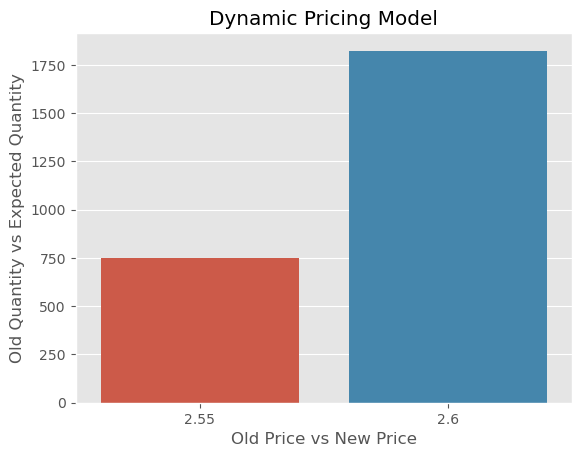

In [85]:
sns.barplot(data=test, x='Price', y='Quantity')
plt.xlabel('Old Price vs New Price')
plt.ylabel('Old Quantity vs Expected Quantity')
plt.title('Dynamic Pricing Model')

## simulating business impact

In [86]:
def simulate_profit(unit_price, quantity, new_price, new_quantity):
    old_profit = unit_price * quantity
    new_profit = new_price * new_quantity
    return old_profit, new_profit

In [87]:
simulate_profit(2.55, 748, 2.6, 1824)

(1907.3999999999999, 4742.400000000001)

In [89]:
#Old Profit is 1907

#New Profit is 4742

### Principal component analysis for dimensionality reduction

In [96]:
from sklearn.decomposition import PCA

In [99]:
pca = PCA(n_components=4)

In [100]:
pca.fit_transform(X)

array([[ 6.45355888e+02,  1.26276484e+00, -4.25708767e+00,
         4.89689986e-01],
       [ 6.45355303e+02,  1.27010874e+00, -3.25729268e+00,
         5.08550160e-01],
       [ 6.45355303e+02,  1.27010874e+00, -3.25729268e+00,
         5.08550160e-01],
       ...,
       [-1.00668433e+02,  6.50995788e+00,  5.28702761e+00,
        -4.32029978e-01],
       [-1.00668433e+02,  6.50995788e+00,  5.28702761e+00,
        -4.32029978e-01],
       [-1.00646378e+02, -8.89808851e-01,  5.34143844e+00,
        -4.34340853e-01]])

### Clusters using KMeans Algorithms

In [101]:
from sklearn.cluster import KMeans

In [102]:
kmeans = KMeans(n_clusters =4)

In [103]:
X_cluster = kmeans.fit_predict(X)

In [104]:
X['cluster'] = X_cluster

In [105]:
X

,UnitPrice,Hour,DayOfWeek,productFrequency,cluster
0,2.55,8,2,748,1
1,2.55,9,2,748,1
2,2.55,9,2,748,1
3,2.55,10,2,748,1
4,2.55,10,2,748,1
...,...,...,...,...,...
3641,6.75,17,3,2,0
3642,295.00,18,3,1,0
3643,9.95,18,3,2,0
3644,9.95,18,3,2,0


In [106]:
inertia = []

for num_of_cluster in range(1,10):
    kmeans = KMeans(n_clusters=num_of_cluster, random_state=0).fit(X)
    inertia.append(kmeans.inertia_)

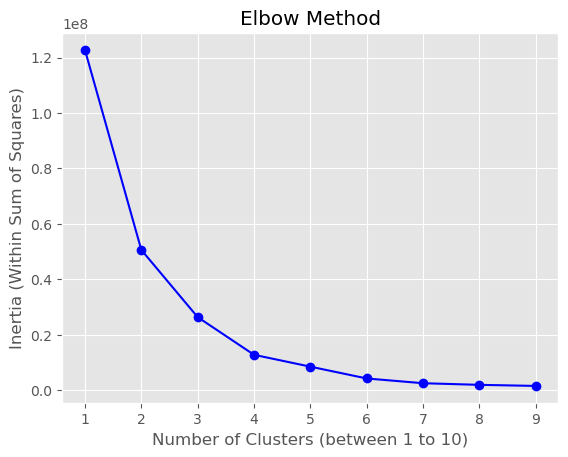

In [107]:
plt.plot(range(1,10), inertia, 'bo-')
plt.xlabel('Number of Clusters (between 1 to 10)')
plt.ylabel('Inertia (Within Sum of Squares)')
plt.title('Elbow Method')
plt.show()

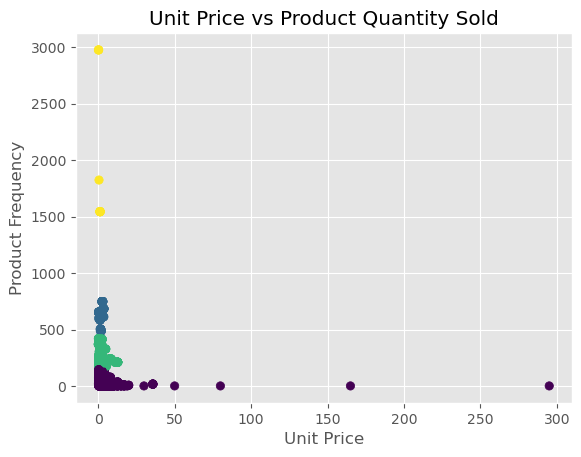

In [108]:
plt.scatter(X["UnitPrice"], X["productFrequency"], c=X['cluster'])
plt.xlabel("Unit Price")
plt.ylabel("Product Frequency")
plt.title("Unit Price vs Product Quantity Sold")
plt.show()